In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\ndeep\Desktop\energy7\preprocess\nonull\SECR2_TWS.csv")
data.head()

,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,Polling of A,Polling of B
0,10-02-2025 9.37,Mandir Hasaud,PT71,Reverse,"[0.0, 2.3, 2.8, 2.0, 1.5, 1.3, 1.2, 1.2, 1.2, ...","[0.0, 55.5, 93.0, 111.0, 120.0, 124.5, 127.5, ...","[0.0, 3.3, 2.5, 1.9, 1.5, 1.2, 1.1, 1.0, 1.0, ...","[0.0, 18.0, 75.0, 102.0, 115.5, 123.0, 126.0, ...",TWS,TWS,100,100
1,10-02-2025 10.23,Mandir Hasaud,PT71,Reverse,"[0.0, 3.3, 2.5, 1.8, 1.4, 1.2, 1.2, 1.2, 1.2, ...","[0.0, 45.0, 88.5, 109.5, 118.5, 124.5, 127.5, ...","[0.0, 3.3, 2.5, 1.8, 1.4, 1.2, 1.1, 1.0, 1.0, ...","[0.0, 57.0, 94.5, 112.5, 121.5, 126.0, 127.5, ...",TWS,TWS,100,100
2,10-02-2025 10.29,Mandir Hasaud,PT71,Normal,"[0.0, 3.3, 2.4, 1.8, 1.4, 1.2, 1.3, 1.3, 1.3, ...","[0.0, 60.0, 94.5, 112.5, 121.5, 126.0, 127.5, ...","[0.0, 3.0, 2.2, 1.6, 1.3, 1.1, 1.0, 1.0, 1.0, ...","[0.0, 10.5, 70.5, 100.5, 114.0, 121.5, 126.0, ...",TWS,TWS,100,100
3,10-02-2025 9.58,Mandir Hasaud,PT71,Normal,"[0.0, 1.4, 2.9, 2.1, 1.6, 1.3, 1.2, 1.3, 1.2, ...","[0.0, 10.5, 72.0, 100.5, 115.5, 123.0, 126.0, ...","[0.0, 3.1, 2.3, 1.7, 1.4, 1.1, 1.0, 1.0, 1.0, ...","[0.0, 52.5, 91.5, 111.0, 120.0, 124.5, 127.5, ...",TWS,TWS,100,100
4,10-02-2025 16.32,Mandir Hasaud,PT71,Reverse,"[0.0, 2.9, 2.6, 1.9, 1.5, 1.3, 1.2, 1.2, 1.3, ...","[0.0, 60.0, 96.0, 112.5, 120.0, 124.5, 126.0, ...","[0.0, 3.2, 2.4, 1.8, 1.4, 1.2, 1.1, 1.0, 1.0, ...","[0.0, 22.5, 76.5, 105.0, 117.0, 124.5, 126.0, ...",TWS,TWS,100,100


In [8]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# Feature extraction function
def extract_features(ts):
    if not isinstance(ts, list) or len(ts) == 0 or all(pd.isna(ts)):
        return [np.nan]*9
    
    arr = np.array(ts)
    mean = np.mean(arr)
    std = np.std(arr)
    maximum = np.max(arr)
    minimum = np.min(arr)
    total = np.sum(arr)
    duration = len(arr)
    range_val = maximum - minimum
    slope = (arr[-1] - arr[0]) / duration if duration > 1 else 0
    
    # Optional: number of peaks
    peaks, _ = find_peaks(arr)
    num_peaks = len(peaks)
    
    return [mean, std, maximum, minimum, range_val, total, duration, slope, num_peaks]

# Feature column names
feature_names = ['mean', 'std', 'max', 'min', 'range', 'sum', 'duration', 'slope', 'num_peaks']

# Apply to each signal
all_features = pd.DataFrame()

for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    features = pd.DataFrame(data[col].apply(extract_features).tolist(), columns=[f"{col}_{f}" for f in feature_names])
    all_features = pd.concat([all_features, features], axis=1)

# Combine with metadata if needed
data_features = pd.concat([data.reset_index(drop=True), all_features], axis=1)

# Preview result
data_features.head()
# data_features.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\secr2.csv", index=False)
# print("Features extracted and saved ✅")


,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,...,B Current_num_peaks,B Voltage_mean,B Voltage_std,B Voltage_max,B Voltage_min,B Voltage_range,B Voltage_sum,B Voltage_duration,B Voltage_slope,B Voltage_num_peaks
0,10-02-2025 9.37,Mandir Hasaud,PT71,Reverse,"[0.0, 2.3, 2.8, 2.0, 1.5, 1.3, 1.2, 1.2, 1.2, ...","[0.0, 55.5, 93.0, 111.0, 120.0, 124.5, 127.5, ...","[0.0, 3.3, 2.5, 1.9, 1.5, 1.2, 1.1, 1.0, 1.0, ...","[0.0, 18.0, 75.0, 102.0, 115.5, 123.0, 126.0, ...",TWS,TWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10-02-2025 10.23,Mandir Hasaud,PT71,Reverse,"[0.0, 3.3, 2.5, 1.8, 1.4, 1.2, 1.2, 1.2, 1.2, ...","[0.0, 45.0, 88.5, 109.5, 118.5, 124.5, 127.5, ...","[0.0, 3.3, 2.5, 1.8, 1.4, 1.2, 1.1, 1.0, 1.0, ...","[0.0, 57.0, 94.5, 112.5, 121.5, 126.0, 127.5, ...",TWS,TWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10-02-2025 10.29,Mandir Hasaud,PT71,Normal,"[0.0, 3.3, 2.4, 1.8, 1.4, 1.2, 1.3, 1.3, 1.3, ...","[0.0, 60.0, 94.5, 112.5, 121.5, 126.0, 127.5, ...","[0.0, 3.0, 2.2, 1.6, 1.3, 1.1, 1.0, 1.0, 1.0, ...","[0.0, 10.5, 70.5, 100.5, 114.0, 121.5, 126.0, ...",TWS,TWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10-02-2025 9.58,Mandir Hasaud,PT71,Normal,"[0.0, 1.4, 2.9, 2.1, 1.6, 1.3, 1.2, 1.3, 1.2, ...","[0.0, 10.5, 72.0, 100.5, 115.5, 123.0, 126.0, ...","[0.0, 3.1, 2.3, 1.7, 1.4, 1.1, 1.0, 1.0, 1.0, ...","[0.0, 52.5, 91.5, 111.0, 120.0, 124.5, 127.5, ...",TWS,TWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10-02-2025 16.32,Mandir Hasaud,PT71,Reverse,"[0.0, 2.9, 2.6, 1.9, 1.5, 1.3, 1.2, 1.2, 1.3, ...","[0.0, 60.0, 96.0, 112.5, 120.0, 124.5, 126.0, ...","[0.0, 3.2, 2.4, 1.8, 1.4, 1.2, 1.1, 1.0, 1.0, ...","[0.0, 22.5, 76.5, 105.0, 117.0, 124.5, 126.0, ...",TWS,TWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(type(data['A Current'].iloc[0]))


<class 'str'>


In [7]:
import numpy as np
import pandas as pd
import ast
from scipy.signal import find_peaks

# Load your dataset
data = pd.read_csv(r"C:\Users\ndeep\Desktop\energy7\preprocess\nonull\SECR2_TWS.csv")

# Step 1: Convert stringified lists to actual lists
def safe_parse_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return np.nan

for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    data[col] = data[col].apply(safe_parse_list)

# Step 2: Define feature extraction
def extract_features(ts):
    if not isinstance(ts, list) or len(ts) == 0 or all(pd.isna(ts)):
        return [np.nan]*9

    arr = np.array(ts)
    mean = np.mean(arr)
    std = np.std(arr)
    maximum = np.max(arr)
    minimum = np.min(arr)
    total = np.sum(arr)
    duration = len(arr)
    range_val = maximum - minimum
    slope = (arr[-1] - arr[0]) / duration if duration > 1 else 0
    peaks, _ = find_peaks(arr)
    num_peaks = len(peaks)

    return [mean, std, maximum, minimum, range_val, total, duration, slope, num_peaks]

# Step 3: Extract features
feature_names = ['mean', 'std', 'max', 'min', 'range', 'sum', 'duration', 'slope', 'num_peaks']
all_features = pd.DataFrame()

for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    features = pd.DataFrame(data[col].apply(extract_features).tolist(), columns=[f"{col}_{f}" for f in feature_names])
    all_features = pd.concat([all_features, features], axis=1)

# Step 4: Combine and preview
data_features = pd.concat([data.reset_index(drop=True), all_features], axis=1)
print("✅ Feature extraction complete!")
data_features.head()
data_features.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\secr2_wf.csv", index=False)
print("Features extracted and saved ✅")

✅ Feature extraction complete!
Features extracted and saved ✅


In [17]:
des = data_features.describe()
des
# des.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\des_secr2.csv", index=False)
# print("Features extracted and saved ✅")

,Polling of A,Polling of B,A Current_mean,A Current_std,A Current_max,A Current_min,A Current_range,A Current_sum,A Current_duration,A Current_slope,...,B Current_num_peaks,B Voltage_mean,B Voltage_std,B Voltage_max,B Voltage_min,B Voltage_range,B Voltage_sum,B Voltage_duration,B Voltage_slope,B Voltage_num_peaks
count,17881.0,17881.0,17881.000000,17881.000000,17881.000000,17881.0,17881.000000,17881.000000,17881.000000,17881.0,...,17881.000000,17881.000000,17881.000000,17881.000000,17881.0,17881.000000,17881.000000,17881.000000,17881.0,17881.000000
mean,100.0,100.0,1.515179,0.789055,3.478827,0.0,3.478827,55.874912,33.995917,0.0,...,2.442928,103.753167,42.859949,128.586309,0.0,128.586309,6692.982630,59.001230,0.0,2.545551
std,0.0,0.0,0.538818,0.269412,1.041630,0.0,1.041630,81.690665,22.250861,0.0,...,0.763323,75.381948,27.225013,88.011523,0.0,88.011523,14763.491796,44.176437,0.0,4.144234
min,100.0,100.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,0.0,0.000000
25%,100.0,100.0,1.072414,0.597732,2.800000,0.0,2.800000,31.500000,29.000000,0.0,...,2.000000,95.709677,39.427777,115.500000,0.0,115.500000,3295.500000,34.000000,0.0,1.000000
50%,100.0,100.0,1.312903,0.636120,2.900000,0.0,2.900000,42.200000,31.000000,0.0,...,2.000000,100.242857,42.226782,129.000000,0.0,129.000000,3483.000000,35.000000,0.0,2.000000
75%,100.0,100.0,2.074194,1.057019,4.300000,0.0,4.300000,63.600000,33.000000,0.0,...,3.000000,102.590909,48.877415,133.500000,0.0,133.500000,6388.500000,57.000000,0.0,2.000000
max,100.0,100.0,6.525812,2.378957,6.800000,0.0,6.800000,4788.100000,794.000000,0.0,...,23.000000,1574.447368,583.819543,1815.000000,0.0,1815.000000,306445.500000,804.000000,0.0,174.000000


In [20]:
from sklearn.preprocessing import StandardScaler
model_data = pd.read_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\secr2_wf.csv")

# Select only extracted feature columns
feature_cols = [col for col in data_features.columns if any(k in col for k in ['A ', 'B ']) and '_' in col]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_features[feature_cols])

# Replace original with scaled
data_scaled = pd.DataFrame(scaled_values, columns=feature_cols)
data_final = pd.concat([data_features.drop(columns=feature_cols), data_scaled], axis=1)
data_final.head()
data_final.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\secr2_scaled.csv", index=False)

In [23]:
data_des = data_final.describe()
data_des.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\desscale_secr2.csv", index=False)
print("saved")
data_des


saved


,Polling of A,Polling of B,A Current_mean,A Current_std,A Current_max,A Current_min,A Current_range,A Current_sum,A Current_duration,A Current_slope,...,B Current_num_peaks,B Voltage_mean,B Voltage_std,B Voltage_max,B Voltage_min,B Voltage_range,B Voltage_sum,B Voltage_duration,B Voltage_slope,B Voltage_num_peaks
count,17881.0,17881.0,17881.000000,1.788100e+04,1.788100e+04,17881.0,1.788100e+04,1.788100e+04,1.788100e+04,17881.0,...,1.788100e+04,1.788100e+04,1.788100e+04,1.788100e+04,17881.0,1.788100e+04,1.788100e+04,1.788100e+04,17881.0,1.788100e+04
mean,100.0,100.0,0.000000,2.543187e-17,2.797506e-16,0.0,2.797506e-16,-2.225289e-17,1.176224e-16,0.0,...,1.096750e-16,-3.337934e-17,9.536953e-17,1.716652e-16,0.0,1.716652e-16,-5.165850e-17,-1.144434e-16,0.0,8.980631e-17
std,0.0,0.0,1.000028,1.000028e+00,1.000028e+00,0.0,1.000028e+00,1.000028e+00,1.000028e+00,0.0,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,0.0,1.000028e+00,1.000028e+00,1.000028e+00,0.0,1.000028e+00
min,100.0,100.0,-2.812120,-2.928882e+00,-3.339884e+00,0.0,-3.339884e+00,-6.840007e-01,-1.393060e+00,0.0,...,-3.200474e+00,-1.376405e+00,-1.574330e+00,-1.461058e+00,0.0,-1.461058e+00,-4.533595e-01,-1.267707e+00,0.0,-6.142565e-01
25%,100.0,100.0,-0.821757,-7.101665e-01,-6.517147e-01,0.0,-6.517147e-01,-2.983890e-01,-2.245332e-01,0.0,...,-5.802791e-01,-1.067061e-01,-1.260704e-01,-1.486928e-01,0.0,-1.486928e-01,-2.301337e-01,-5.659562e-01,0.0,-3.729506e-01
50%,100.0,100.0,-0.375417,-5.676765e-01,-5.557086e-01,0.0,-5.557086e-01,-1.674034e-01,-1.346465e-01,0.0,...,-5.802791e-01,-4.656829e-02,-2.325747e-02,4.700544e-03,0.0,4.700544e-03,-2.174331e-01,-5.433191e-01,0.0,-1.316447e-01
75%,100.0,100.0,1.037511,9.946535e-01,7.883760e-01,0.0,7.883760e-01,9.456777e-02,-4.475985e-02,0.0,...,7.298182e-01,-1.541869e-02,2.210333e-01,5.583164e-02,0.0,5.583164e-02,-2.062460e-02,-4.530212e-02,0.0,-1.316447e-01
max,100.0,100.0,9.299560,5.901541e+00,3.188527e+00,0.0,3.188527e+00,5.793021e+01,3.415712e+01,0.0,...,2.693176e+01,1.951044e+01,1.987050e+01,1.916182e+01,0.0,1.916182e+01,2.030420e+01,1.686464e+01,0.0,4.137297e+01


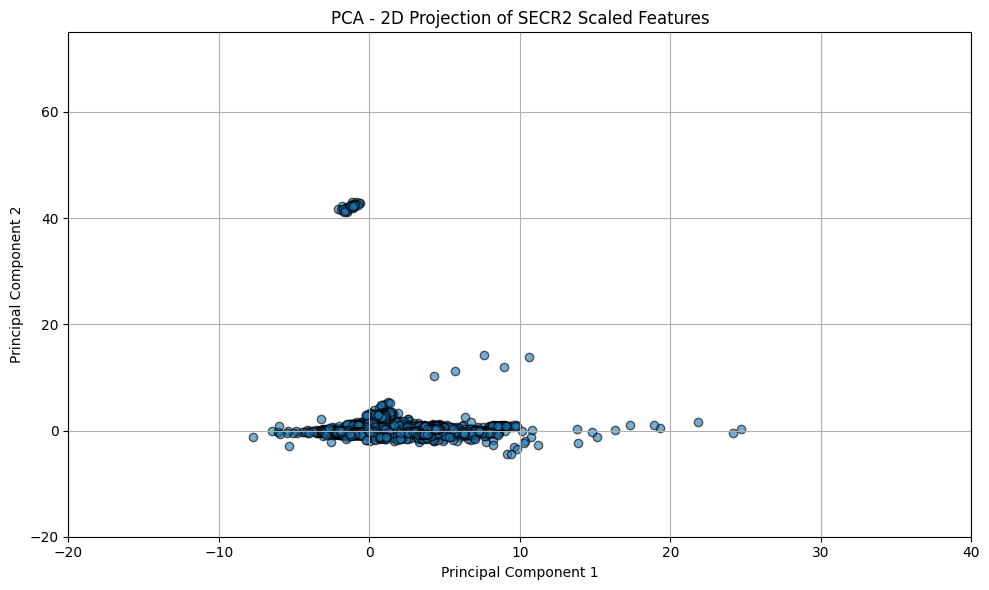

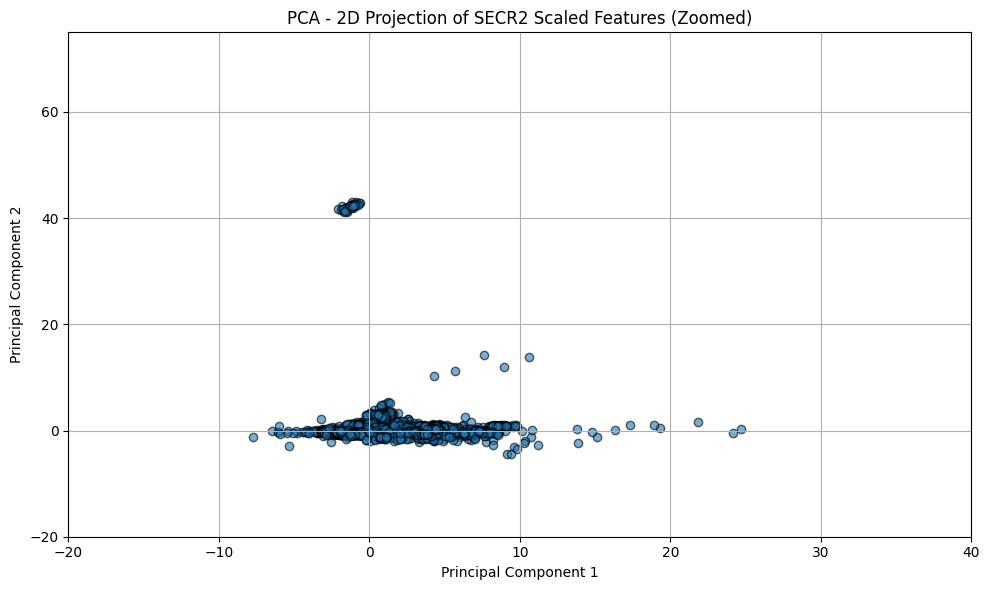

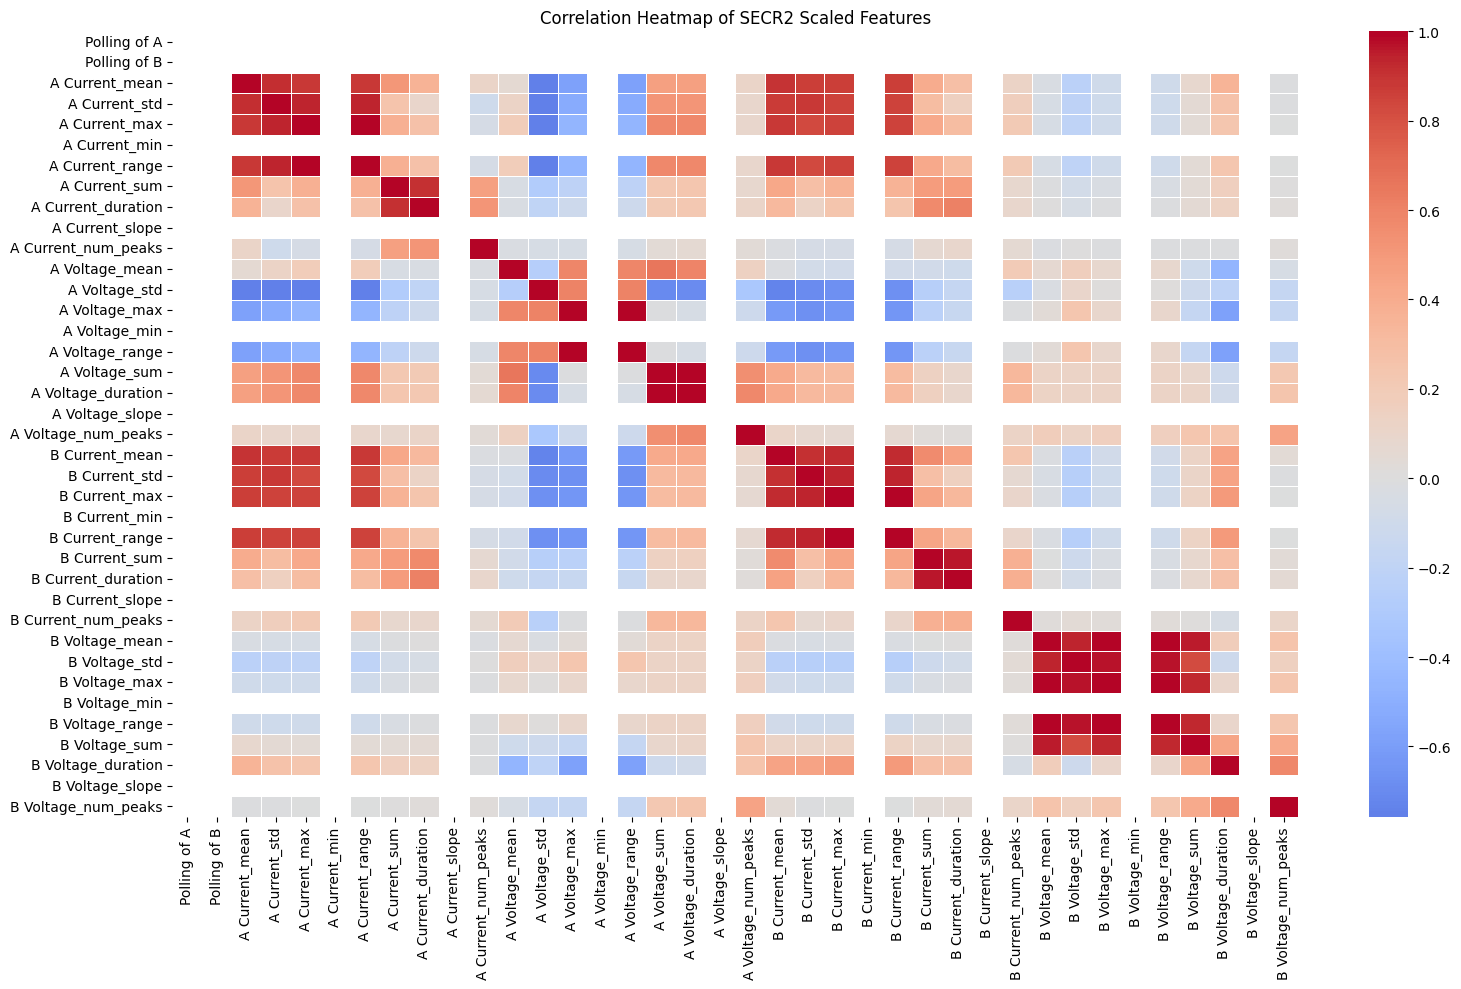

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load your main dataset
data = pd.read_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\secr2_scaled.csv")

# Filter only numeric columns for visualization
feature_cols = data.select_dtypes(include='number').columns
X_scaled = data[feature_cols]

# --- PCA with 95% Variance ---
pca = PCA(n_components=0.95, random_state=42)
pca_result = pca.fit_transform(X_scaled)

# --- PCA Scatter Plot 1 ---
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, edgecolor='k')
plt.xlim(-20, 40)
plt.ylim(-20, 75)
plt.title('PCA - 2D Projection of SECR2 Scaled Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- PCA Scatter Plot 2 ---
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, edgecolor='k')
plt.xlim(-20, 40)
plt.ylim(-20, 75)
plt.title('PCA - 2D Projection of SECR2 Scaled Features (Zoomed)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(16, 10))
corr_matrix = X_scaled.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of SECR2 Scaled Features')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
data_final['anomaly'] = iso.fit_predict(data)  # `data_scaled` = scaled features
# -1 = anomaly, 1 = normal


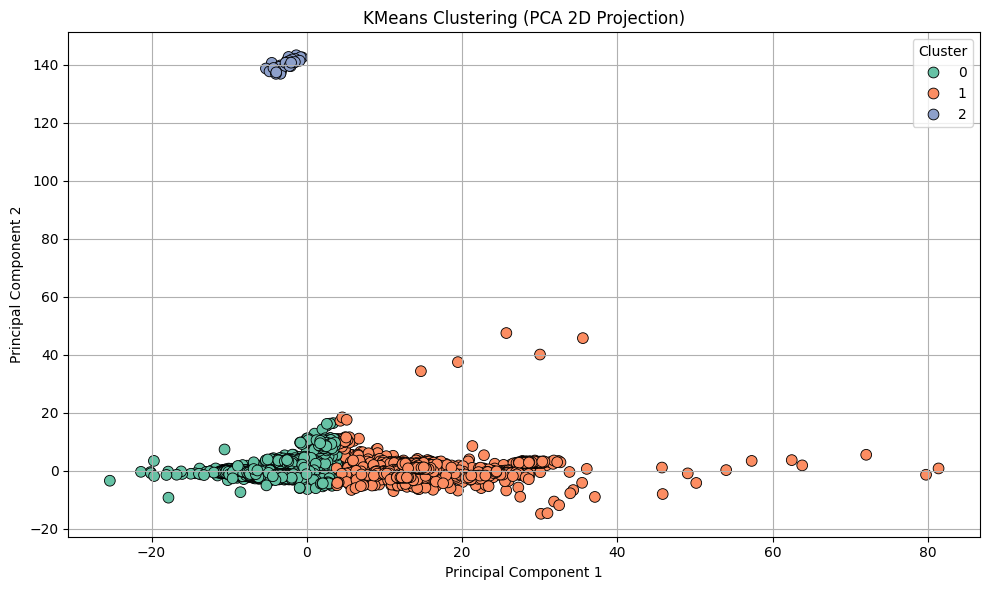

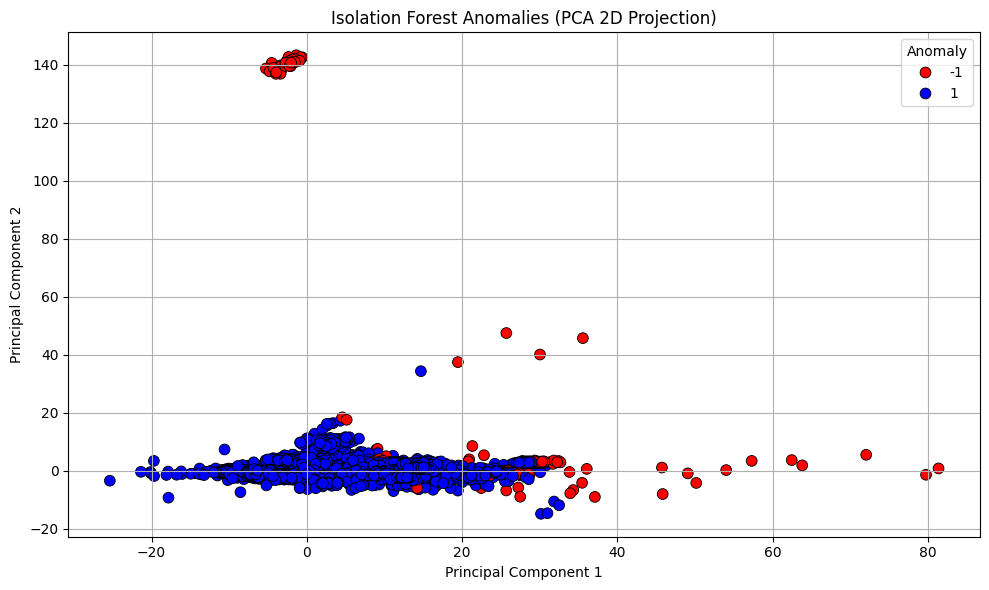

✅ Labeled data saved for summary report.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Load the dataset
# data = pd.read_csv("C:/Users/ndeep/Desktop/energy7/preprocess/secr2_scaled.csv")

# Select numeric features
feature_cols = data.select_dtypes(include='number').columns
X = data[feature_cols]

# 1️⃣ KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(X)
labels = kmeans.fit_predict(X)

# 2️⃣ Isolation Forest Anomaly Detection
iso = IsolationForest(contamination=0.01, random_state=42)
data['Anomaly_IF'] = iso.fit_predict(X)  # -1 = anomaly, 1 = normal

# 3️⃣ PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
data['PC1'] = X_pca[:, 0]
data['PC2'] = X_pca[:, 1]

# 4️⃣ PCA Plot - KMeans Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster_KMeans', palette='Set2', s=60, edgecolor='k')
plt.title("KMeans Clustering (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 5️⃣ PCA Plot - Isolation Forest Anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Anomaly_IF', palette={1: 'blue', -1: 'red'}, s=60, edgecolor='k')
plt.title("Isolation Forest Anomalies (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='Anomaly')
plt.tight_layout()
plt.show()

data.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\secr2_cluster_labeled.csv", index=False)
print("✅ Labeled data saved for summary report.")


In [36]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
sil_score = silhouette_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)
db_score = davies_bouldin_score(X, labels)
print(sil_score , ch_score , db_score)

0.7307397688439733 37230.78520464326 0.3267563276769478


In [42]:
import pandas as pd

# Load dataset (if not already loaded with clusters)
data = pd.read_csv(r"C:\Users\ndeep\Desktop\energy7\model\features\secr2_cluster_labeled.csv")

# Run KMeans again to ensure consistency
from sklearn.cluster import KMeans
feature_cols = data.select_dtypes(include='number').columns
X = data[feature_cols]

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(X)

# Optional: Run Isolation Forest for anomaly labels
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly_IF'] = iso.fit_predict(X)

# Create cluster summary with mean of each feature
cluster_summary = data.groupby('Cluster_KMeans')[feature_cols].mean()

# Add number of samples per cluster
cluster_counts = data['Cluster_KMeans'].value_counts().sort_index()
cluster_summary['Sample_Count'] = cluster_counts

# Add anomaly count per cluster
anomaly_counts = data[data['Anomaly_IF'] == -1]['Cluster_KMeans'].value_counts().sort_index()
cluster_summary['Anomaly_Count'] = anomaly_counts
cluster_summary['Anomaly_Count'] = cluster_summary['Anomaly_Count'].fillna(0).astype(int)

# Save to CSV
output_path = r"C:\Users\ndeep\Desktop\energy7\model\features\secr2_cluster_summary.csv"
cluster_summary.to_csv(output_path)

print("✅ Cluster summary saved to:", output_path)


✅ Cluster summary saved to: C:\Users\ndeep\Desktop\energy7\model\features\secr2_cluster_summary.csv
